# Big Data Real-Time Analytics with Python and Spark

## Chapter 5 - Case Study 4 - Feature Engineering for E-commerce Analytics

**Note:** We are working in a big data science project divided in 3 chapters:
* Exploratory data analysis
    - EDA part 
    - EDA part 2 
* **Feature Engineering**
* Data Preprocessing

Feature Engineering refers to the process of using domain knowledge(business area)  to remove, select and transform data, keeping only the most relevant attributes.

![CaseStudy4 DSA](images/CaseStudy4.png "Case Study 4 DSA")

In [1]:
# Python Version
from platform import python_version
print("The version used in this notebook: ", python_version())

The version used in this notebook:  3.8.13


In [2]:
#imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# package version used in this notebook
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

seaborn   : 0.11.2
numpy     : 1.22.3
pandas    : 1.4.2
scipy     : 1.7.3
matplotlib: 3.4.3



## Loading the Dataset

In [4]:
# Loading the dataset
df = pd.read_csv('datasets/dataset.csv')

In [5]:
df.shape

(11000, 12)

In [6]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [9]:
# Numerical variables
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'compras_anteriores',
        'desconto',
        'custo_produto',
        'peso_gramas']

In [10]:
# Categorical variables
cats = ['modo_envio', 'prioridade_produto', 'genero', 'corredor_armazem']

In [11]:
# Target variable
target = ['entregue_no_prazo']

In [12]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,3.567727,13.372545,210.200909,3633.844455
std,1.141438,1.413570,1.522852,16.204943,48.062985,1635.402722
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000


In [13]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [14]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

## Data Cleaning

###  Handling Missing Values
**ATTENTION**: Missing value means missing information, not missing data!

The treatment can be done before, during, or after the Exploratory Analysis, but ideally should be done before the Feature Engineering. **But beware:** Feature Engineering and Preprocessing can generate missing values, which need to be handled.

In [15]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [16]:
# Check if we have nan values
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

###  Handling Duplicate Values
Duplicate values means duplicity of the data in all rows (the entire record)

The treatment can be done before, during, or after the Exploratory Analysis, but ideally should be done before the Feature Engineering.

In [17]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [18]:
# Check duplicates
df.duplicated().sum()

0

### Handling Outliers Values
The treatment can be done before, during, or after the Exploratory Analysis, but ideally should be done before the Feature Engineering.

*formatted string literals* - https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals

In [19]:
print(f'number of rows before filtering out extreme values (Outliers)? {len(df)}')

number of rows before filtering out extreme values (Outliers)? 11000


In [20]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
0,4,2,3,44,177,1233
1,4,5,2,59,216,3088
2,2,2,4,48,183,3374
3,3,3,4,10,176,1177
4,2,2,3,46,184,2484


In [21]:
df.desconto.mean()

13.372545454545454

In [22]:
df.desconto.std()

16.20494287359407

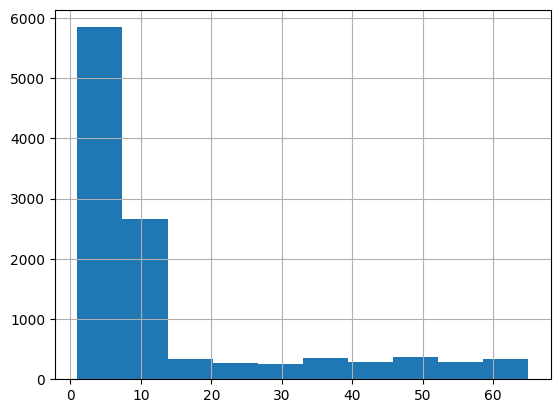

In [23]:
df.desconto.hist();

In [24]:
# calculate the upper and lower limits
# An outlier is a value that is either below the lower limit or above the upper limit.
limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print('Valor superior:', limite_superior)
limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print('Valor inferior:', limite_inferior)

Valor superior: 61.987374075327665
Valor inferior: -35.24228316623676


In [25]:
# Extract the records with outliers in the discount column
df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [26]:
# Filters the dataframe by removing outliers in the discount column.
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [27]:
print(f'number of rows after filtering out extreme values (Outliers): {len(df)}')

number of rows after filtering out extreme values (Outliers): 10819


In [28]:
registros = np.array([True] * len(df))

In [29]:
type(registros)

numpy.ndarray

In [30]:
np.count_nonzero(registros == True)

10819

In [31]:
np.count_nonzero(registros == False)

0

In [32]:
# Numerical variables (Without the `desconto` variable)
nums2 = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'compras_anteriores',
        'custo_produto',
        'peso_gramas']

In [33]:
# Loop for each numerical variable
for col in nums2:
    
    # Calculate the absolute z-score
    zscore = abs(stats.zscore(df[col]))
    
    # Keeps values with less than 3 absolute z-score
    registros = (zscore < 3) & registros

In [34]:
np.count_nonzero(registros == True)

10643

In [35]:
np.count_nonzero(registros == False)

176

In [36]:
# Delete records with less than 3 z-score in the numerical columns
df = df[registros]

In [37]:
print(f'number of rows after filtering out extreme values (Outliers): {len(df)} ')

number of rows after filtering out extreme values (Outliers): 10643 


### Dealing with Imbalanced Data
The treatment must be done on the training data, after pre-processing the data.


In [38]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [39]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

**For this data set, the proportion is not very large. There is not an unbalance problem**.

It doesn't have to be equal to the proportion. 60% 40%, 55% 45% is reasonable, and here we have 59% 41%.

## Feature Engineering
### Feature Selection
Here we make the decisions about which variables will be used in Attribute Engineering.

In [40]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [41]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
5462,5463,A,Caminhao,6,2,304,4,baixa,M,2,1256,1
8712,8713,D,Navio,4,2,133,6,media,F,9,4879,0
9871,9872,F,Aviao,3,3,214,2,media,F,9,4185,0
7823,7824,F,Aviao,3,5,257,3,media,M,4,5196,1
4126,4127,C,Aviao,4,3,249,3,baixa,M,5,5017,1


In [42]:
# Correlation
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


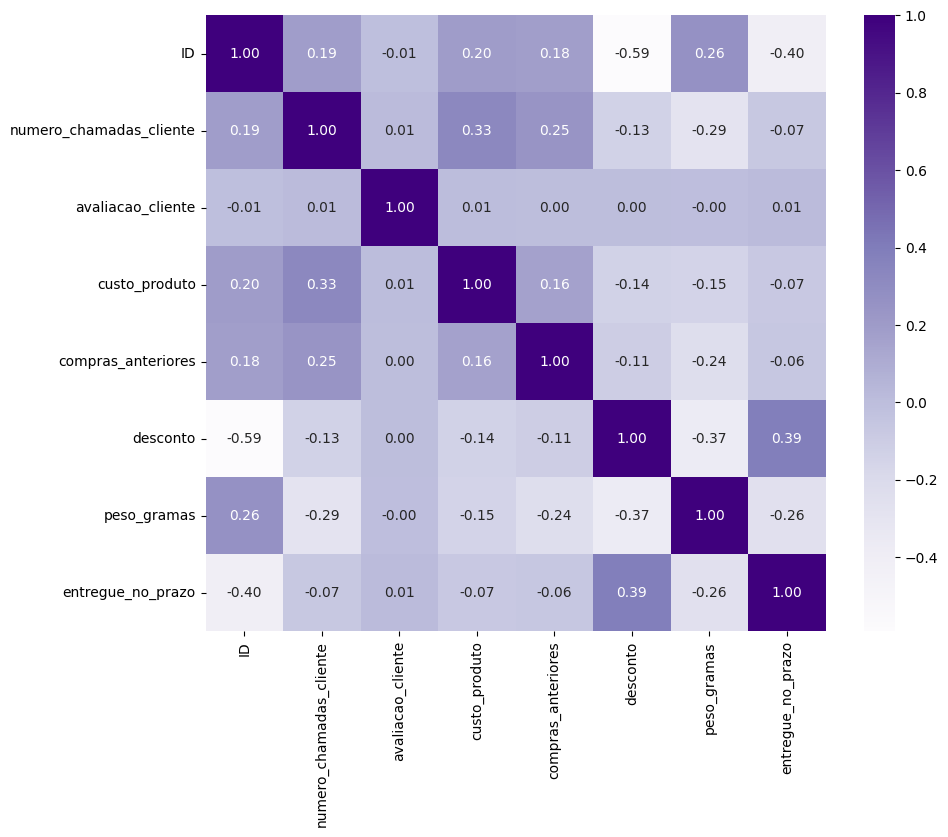

In [43]:
# Correlation map
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decision:** In the figure above, features that exceed the limit (+/-0.05) in correlation with the target feature (entregue_no_prazo) will be chosen to be processed in Attribute Engineering, in this case: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto and perso_gramas.

the variable 'avaliacao_cliente' does not seem relevant and will not be processed in Feature Engineering. The variable 'ID' will be discarded, as it does not represent useful information.

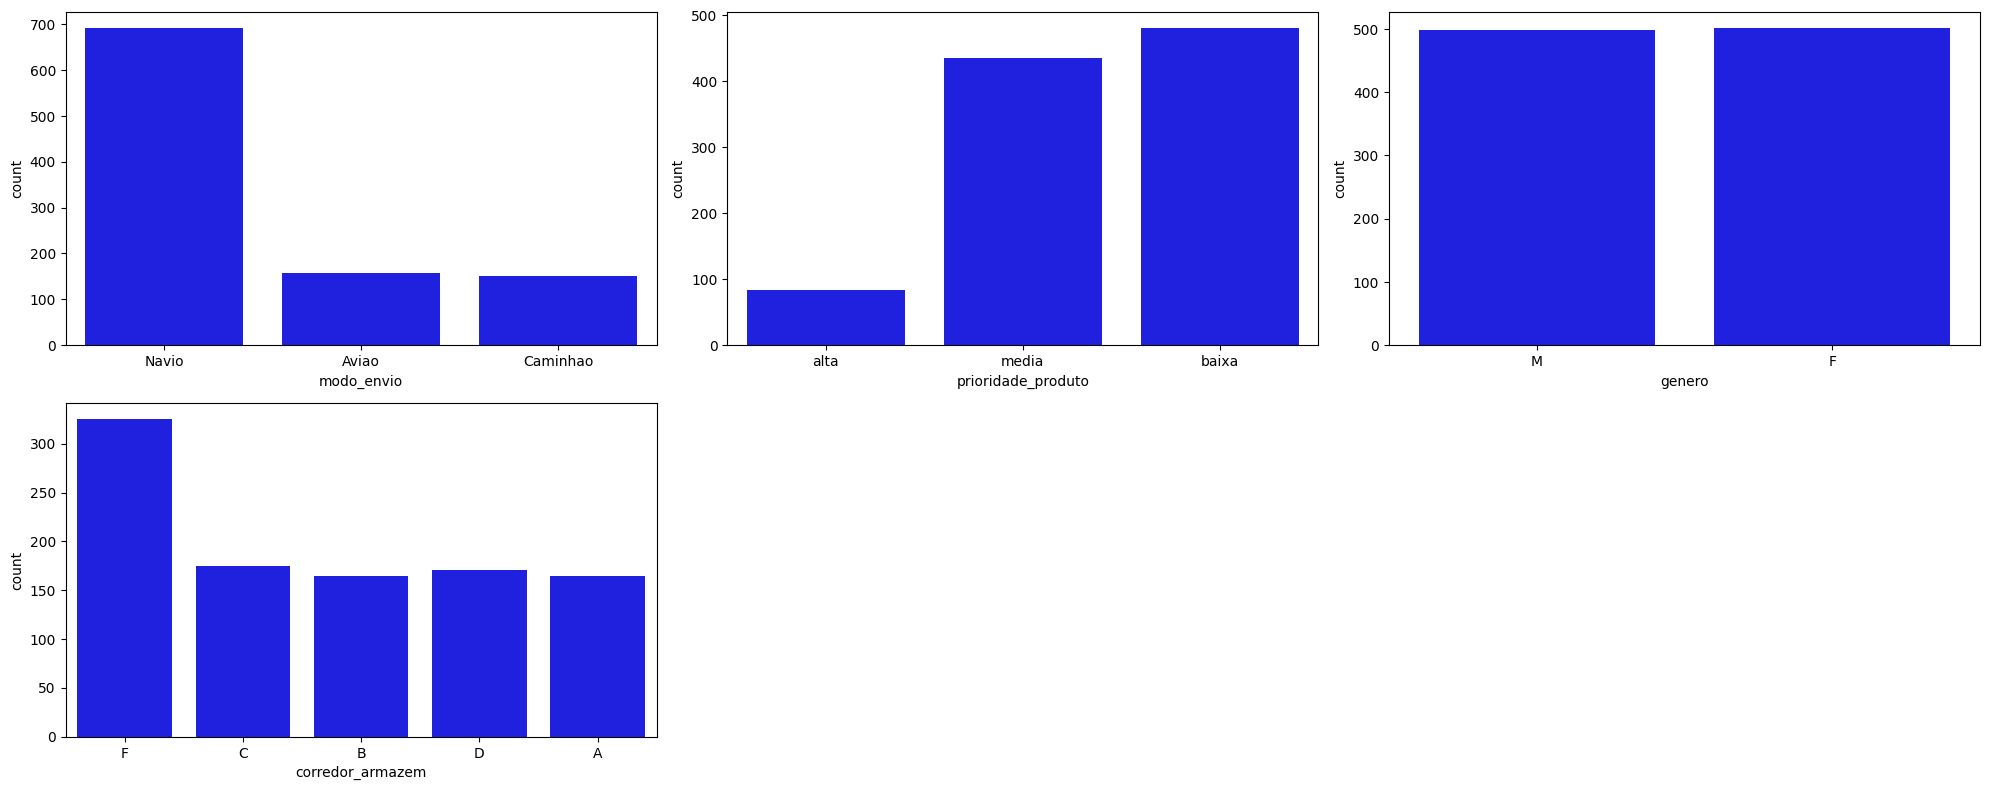

In [44]:
# Bar graph
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20, 8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decision:** In the bar graph you can see that all the categorical variables have a large difference in terms of class counts, except the variable 'genero'. Therefore, we will not consider the variable 'genero' in Feature Engineering.

**Note:** Since the following tasks are complex, we will only demonstrate with some columns. Feel free to re-do the Feature Engineering using all columns selected according to what we defined above.

### Feature Extraction
Here we will extract new variables from the information contained in other variables.

In [45]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [46]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [47]:
# Creat a dataframe copy
df_eng = df.copy()

In [48]:
df_eng.shape

(10643, 12)

In [49]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

## 1. Product Delivering Performance by Product Priority
Is every delay in delivering the same, that is, the same proportion? Does the priority of product delivery generate more or fewer delays?

We will create a new variable that represents the performance of the product delivery based on the following business rule:
- If the priority of the product was high and there was a delay in delivery, the delay is critical.
- If the priority of the product was medium and there was a delay in delivery, the delay is problematic.
- If the priority of the product was low and there was a delay in delivery, the delay is tolerable.
- Another option means that the delivery was made on time and has no problem.

In [50]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [51]:
# Create a variable with nan
df_eng['performance_prioridade_envio'] = np.nan

In [52]:
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Critical Delay', 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Problematic Delay',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Tolerable Delay', 
    'No Delay')))

In [53]:
df_eng['performance_prioridade_envio'].value_counts()

No Delay             6282
Tolerable Delay      2134
Problematic Delay    1917
Critical Delay        310
Name: performance_prioridade_envio, dtype: int64

In [54]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
10617,10618,B,Navio,3,4,160,3,media,M,3,5662,0,Problematic Delay
6032,6033,A,Aviao,6,3,283,5,media,M,10,1483,0,Problematic Delay
1785,1786,B,Aviao,4,2,149,4,baixa,M,40,1102,1,No Delay
1414,1415,C,Navio,6,5,225,6,baixa,F,55,2052,1,No Delay
2958,2959,D,Navio,4,2,220,3,alta,F,39,2459,1,No Delay


In [55]:
# Grouped the data for analysis
df_report1 = df_eng.groupby(['performance_prioridade_envio',
                            'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Critical Delay,0,310
1,No Delay,1,6282
2,Problematic Delay,0,1917
3,Tolerable Delay,0,2134


In [56]:
# Adjust columns names
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Critical Delay,0,310
1,No Delay,1,6282
2,Problematic Delay,0,1917
3,Tolerable Delay,0,2134


In [57]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                          index = 'performance_prioridade_envio',
                          columns = 'entregue_no_prazo',
                          values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Critical Delay,310.0,NaN
1,No Delay,NaN,6282.0
2,Problematic Delay,1917.0,NaN
3,Tolerable Delay,2134.0,NaN


In [58]:
# New ajust to columns names
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Critical Delay,310.0,NaN
1,No Delay,NaN,6282.0
2,Problematic Delay,1917.0,NaN
3,Tolerable Delay,2134.0,NaN


In [59]:
# Replace nan by 0
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Critical Delay,310.0,0.0
1,No Delay,0.0,6282.0
2,Problematic Delay,1917.0,0.0
3,Tolerable Delay,2134.0,0.0


In [60]:
# Concatenate columns by creating a third variable
df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Critical Delay,310.0,0.0,310.0
1,No Delay,0.0,6282.0,6282.0
2,Problematic Delay,1917.0,0.0,1917.0
3,Tolerable Delay,2134.0,0.0,2134.0


In [61]:
# Delete columns that we do not need anymore
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Critical Delay,310.0
1,No Delay,6282.0
2,Problematic Delay,1917.0
3,Tolerable Delay,2134.0


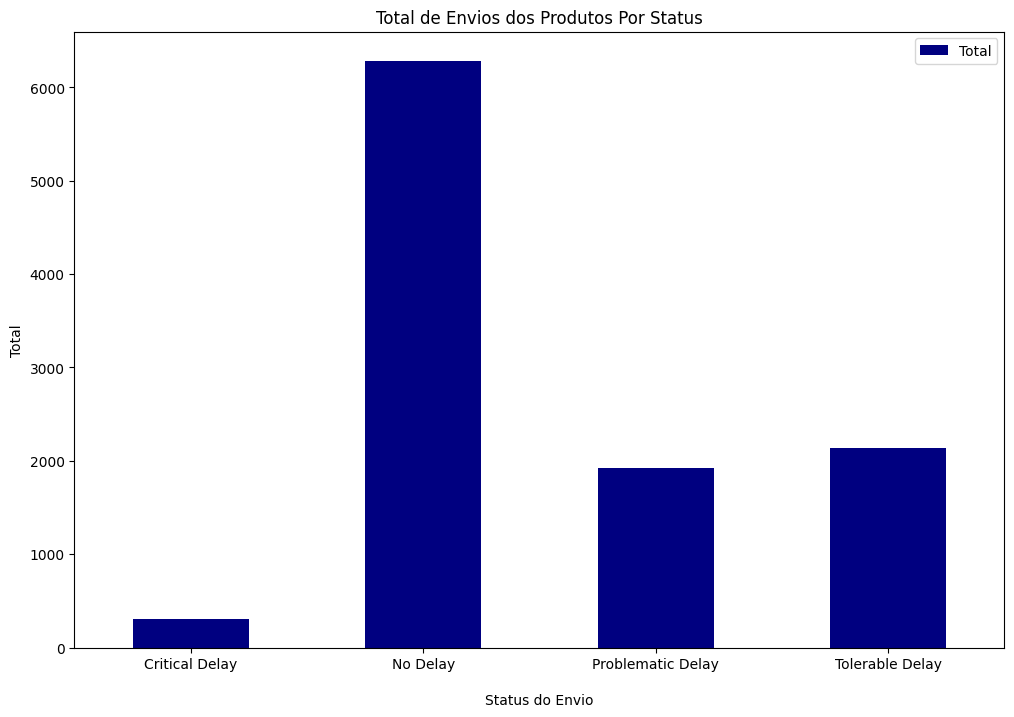

In [62]:
# Plot
df_report1.set_index('Status do Envio').plot(kind = 'bar',
                                            title = 'Total de Envios dos Produtos Por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'jet',
                                            figsize = (12, 8))
plt.xticks(rotation = 0)
plt.show()

## 2. Product Delivering Performance by Product Priority and Delivery Mode

Does the delivery mode ('modo_envio') of the products, associated with the priority of the products' dispatch ('prioridade_produto'), have an impact on the products' delay ('entregue_no_prazo')?

We will create a new variable that represents the performance of the product delivery based on the following business rule:
- If the priority of the product was **high**, the delivery mode was **ship**, and there was a delay in delivery, the delay is critical by Ship.
- If the priority of the product was **medium**, the delivery mode was **ship**, and there was a delay in delivery, the delay is problematic by ship.
- If the priority of the product was **low**, the delivery mode was **ship**, and there was a delay in delivery, the delay is tolerable by ship.


- If the priority of the product was **high**, the delivery mode was **plane**, and there was a delay in delivery, the delay is critical by plane.
- If the priority of the product was **medium**, the delivery mode was **plane**, and there was a delay in delivery, the delay is problematic by plane.
- If the priority of the product was **low**, the delivery mode was **plane**, and there was a delay in delivery, the delay is tolerable by plane.


- If the priority of the product was **high**, the delivery mode was **truck**, and there was a delay in delivery, the delay is critical by truck.
- If the priority of the product was **medium**, the delivery mode was **truck**, and there was a delay in delivery, the delay is problematic by truck.
- If the priority of the product was **low**, the delivery mode was **truck**, and there was a delay in delivery, the delay is tolerable by truck.


- Another option means that the delivery was made **on time** and has no problem.

In [63]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [64]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [65]:
# Solution
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Critical Delay in Delivery by Ship',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Problematic Delay in Delivery by Ship',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Tolerable Delivery Delay by Ship',
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Critical Delivery Delay by Plane',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Problematic Delivery Delay by Plane',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Tolerable Delivery Delay by Plane',
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Critical Delivery Truck Delay',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Problematic Delay in Delivery by Truck',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Tolerable Delivery Delay by Truck',
    'No Delay')))))))))

In [66]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
8124,8125,D,Navio,4,5,275,6,baixa,M,3,5008,0,Tolerable Delay,Tolerable Delivery Delay by Ship
5583,5584,B,Navio,4,4,134,2,baixa,M,1,5209,1,No Delay,No Delay
2289,2290,B,Navio,3,1,238,2,media,F,50,3438,1,No Delay,No Delay
4932,4933,D,Aviao,5,1,266,3,baixa,M,10,5858,0,Tolerable Delay,Tolerable Delivery Delay by Plane
3455,3456,F,Navio,5,3,206,4,alta,F,1,4583,0,Critical Delay,Critical Delay in Delivery by Ship


In [67]:
df_eng.performance_modo_envio.value_counts()

No Delay                                  6282
Tolerable Delivery Delay by Ship          1453
Problematic Delay in Delivery by Ship     1307
Tolerable Delivery Delay by Truck          350
Tolerable Delivery Delay by Plane          331
Problematic Delay in Delivery by Truck     310
Problematic Delivery Delay by Plane        300
Critical Delay in Delivery by Ship         194
Critical Delivery Delay by Plane            65
Critical Delivery Truck Delay               51
Name: performance_modo_envio, dtype: int64

In [68]:
df_report2 = df_eng.groupby(['performance_modo_envio',
                            'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Critical Delay in Delivery by Ship,0,194
1,Critical Delivery Delay by Plane,0,65
2,Critical Delivery Truck Delay,0,51
3,No Delay,1,6282
4,Problematic Delay in Delivery by Ship,0,1307
5,Problematic Delay in Delivery by Truck,0,310
6,Problematic Delivery Delay by Plane,0,300
7,Tolerable Delivery Delay by Plane,0,331
8,Tolerable Delivery Delay by Ship,0,1453


In [69]:
df_report2.drop(df_report2.columns[1], axis = 1, inplace = True)
df_report2.head()

,performance_modo_envio,prioridade_produto
,,count
0,Critical Delay in Delivery by Ship,194
1,Critical Delivery Delay by Plane,65
2,Critical Delivery Truck Delay,51
3,No Delay,6282
4,Problematic Delay in Delivery by Ship,1307


In [70]:
df_report2.columns = ['Status do Envio', 'Total']
df_report2.head(10)

,Status do Envio,Total
0,Critical Delay in Delivery by Ship,194
1,Critical Delivery Delay by Plane,65
2,Critical Delivery Truck Delay,51
3,No Delay,6282
4,Problematic Delay in Delivery by Ship,1307
5,Problematic Delay in Delivery by Truck,310
6,Problematic Delivery Delay by Plane,300
7,Tolerable Delivery Delay by Plane,331
8,Tolerable Delivery Delay by Ship,1453
9,Tolerable Delivery Delay by Truck,350


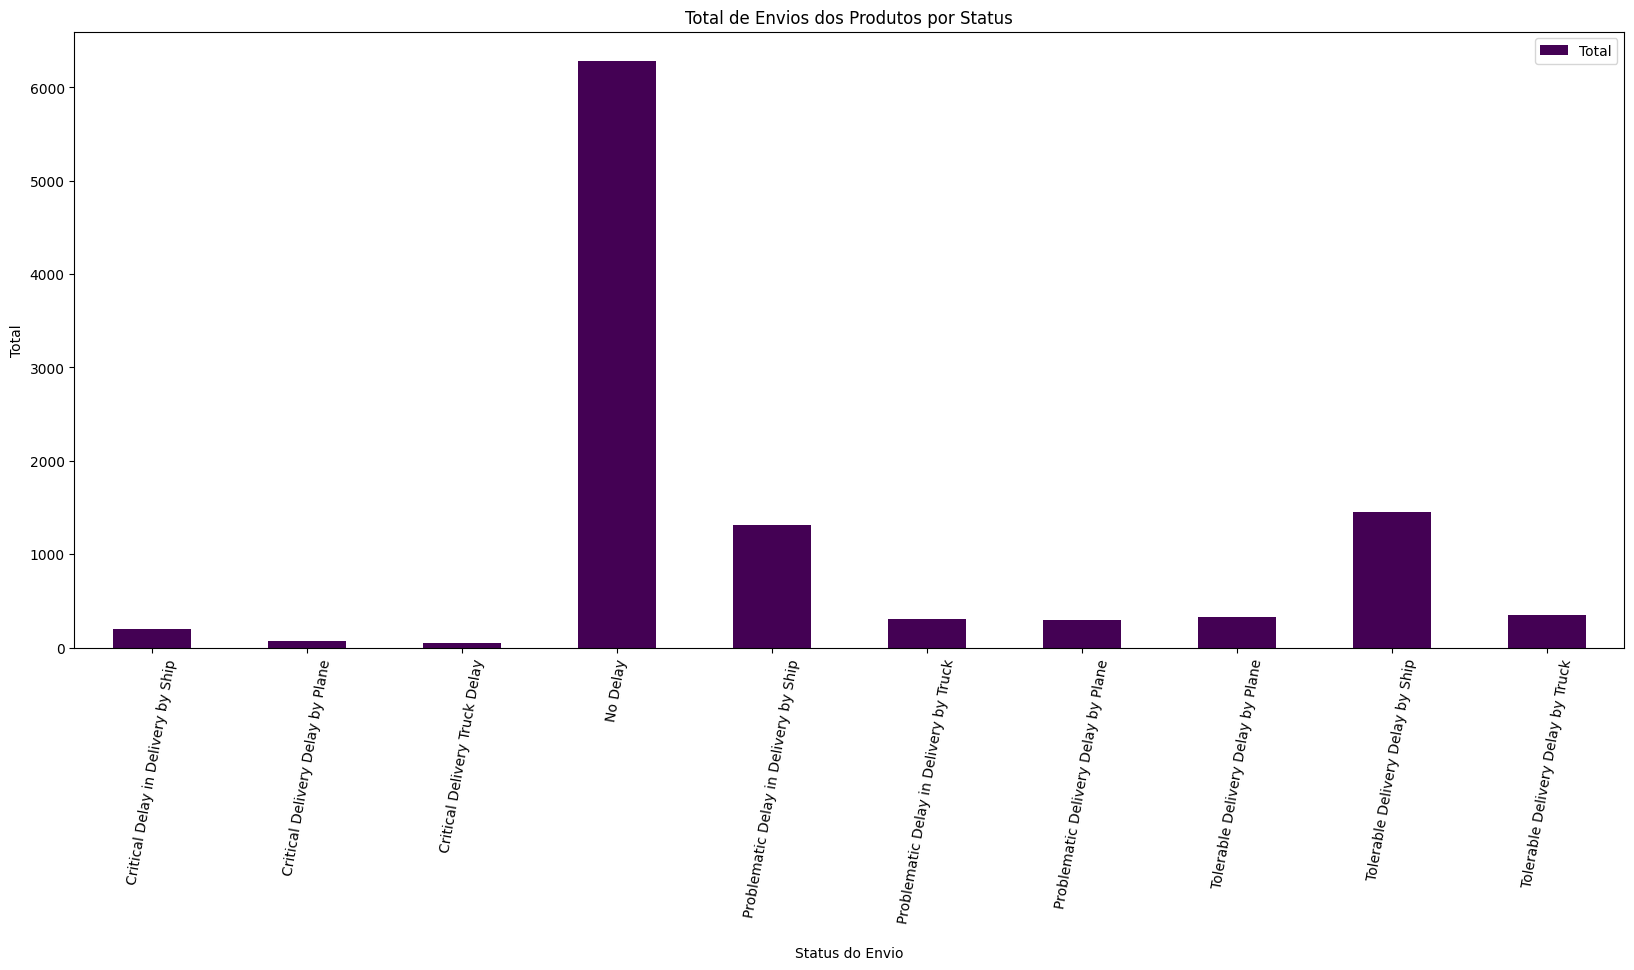

In [71]:
# Plot
df_report2.set_index('Status do Envio').plot(kind = 'bar',
                                            title = 'Total de Envios dos Produtos por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'viridis',
                                            figsize = (20, 8))
plt.xticks(rotation = 80)
plt.show()

## 3. Delivery Performance Considering Discounts
Is there a difference in the shipping performance of the products when the product receives some kind of discount?

We will create two new variables based on the following business rule:
#### Variable 1 - faixa_desconto
- Discount above or equal to the average
- Below average discount

#### Variable 2 - performance_faixa_desconto
- If the discount range was above or equal to the average and there was a delay in delivery = `Late Delivery at Above Average Discount`
- If the discount range was above or equal to the average and there was no delay in delivery = `On Time Delivery at Above Average Discount`
- If the discount range was below average and there was a delay in delivery = `Late Delivery with a Below Average discount`
- If the discount range was below average and there was no delay in delivery = `On Time Delivery at Below Average Discount`

In [72]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
8754,8755,D,Caminhao,6,4,220,4,baixa,M,5,5465,1,No Delay,No Delay
6658,6659,C,Navio,3,2,250,4,baixa,F,3,5449,1,No Delay,No Delay
4898,4899,A,Navio,4,5,159,5,baixa,F,7,4063,0,Tolerable Delay,Tolerable Delivery Delay by Ship
5956,5957,C,Navio,2,5,241,3,media,F,3,4253,1,No Delay,No Delay
8862,8863,D,Navio,4,5,239,5,baixa,M,6,1336,0,Tolerable Delay,Tolerable Delivery Delay by Ship


In [73]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [74]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [75]:
# Variable 1
df_eng['discount_range'] = np.where(df_eng.desconto >= 12, 'Above Average Discount', 'Below Average Discount')

In [76]:
df_eng['discount_range'].value_counts()

Below Average Discount    8269
Above Average Discount    2374
Name: discount_range, dtype: int64

In [77]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,discount_range
3254,3255,A,Navio,3,4,100,3,media,M,4,4191,0,Problematic Delay,Problematic Delay in Delivery by Ship,Below Average Discount
4277,4278,F,Navio,4,1,163,2,baixa,F,3,4099,1,No Delay,No Delay,Below Average Discount
7531,7532,F,Aviao,4,4,148,2,baixa,M,4,5437,0,Tolerable Delay,Tolerable Delivery Delay by Plane,Below Average Discount
8114,8115,A,Navio,4,2,249,3,baixa,F,9,5459,1,No Delay,No Delay,Below Average Discount
5488,5489,C,Aviao,5,5,268,3,media,M,2,4459,1,No Delay,No Delay,Below Average Discount


In [78]:
# Variable 2
df_eng['discount_performance_range'] = np.where(
        (df_eng['discount_range'] == 'Above Average Discount') & (df_eng['entregue_no_prazo'] == 0), 'Late Delivery at Above Average Discount',
    np.where(
        (df_eng['discount_range'] == 'Below Average Discount') & (df_eng['entregue_no_prazo'] == 0), 'Late Delivery with a Below Average discount',
    np.where(
        (df_eng['discount_range'] == 'Above Average Discount') & (df_eng['entregue_no_prazo'] == 1), 'On Time Delivery at Above Average',
    np.where(
        (df_eng['discount_range'] == 'Below Average Discount') & (df_eng['entregue_no_prazo'] == 1), 'On Time Delivery at Below Average Discount',
    'NA'))))

In [79]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,discount_range,discount_performance_range
7242,7243,D,Caminhao,6,3,262,6,alta,M,5,4506,0,Critical Delay,Critical Delivery Truck Delay,Below Average Discount,Late Delivery with a Below Average discount
2601,2602,B,Aviao,4,2,238,3,baixa,M,30,3423,1,No Delay,No Delay,Above Average Discount,On Time Delivery at Above Average
5562,5563,D,Navio,4,4,228,4,alta,M,1,5573,0,Critical Delay,Critical Delay in Delivery by Ship,Below Average Discount,Late Delivery with a Below Average discount
7971,7972,B,Navio,4,1,208,2,baixa,M,6,5266,0,Tolerable Delay,Tolerable Delivery Delay by Ship,Below Average Discount,Late Delivery with a Below Average discount
6355,6356,F,Navio,2,4,114,4,baixa,M,9,4452,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount


In [80]:
df_eng['discount_performance_range'].value_counts()

Late Delivery with a Below Average discount    4361
On Time Delivery at Below Average Discount     3908
On Time Delivery at Above Average              2374
Name: discount_performance_range, dtype: int64

In [81]:
# Group the data for analysis
df_report3 = df_eng.groupby(['discount_performance_range',
                            'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,discount_performance_range,entregue_no_prazo,ID
,,,count
0,Late Delivery with a Below Average discount,0,4361
1,On Time Delivery at Above Average,1,2374
2,On Time Delivery at Below Average Discount,1,3908


In [82]:
df_report3.drop(df_report3.columns[1], axis = 1, inplace = True)
df_report3.head()

,discount_performance_range,ID
,,count
0,Late Delivery with a Below Average discount,4361
1,On Time Delivery at Above Average,2374
2,On Time Delivery at Below Average Discount,3908


In [83]:
df_report3.columns = ['Delivery Status', 'Total']
df_report3.head()

,Delivery Status,Total
0,Late Delivery with a Below Average discount,4361
1,On Time Delivery at Above Average,2374
2,On Time Delivery at Below Average Discount,3908


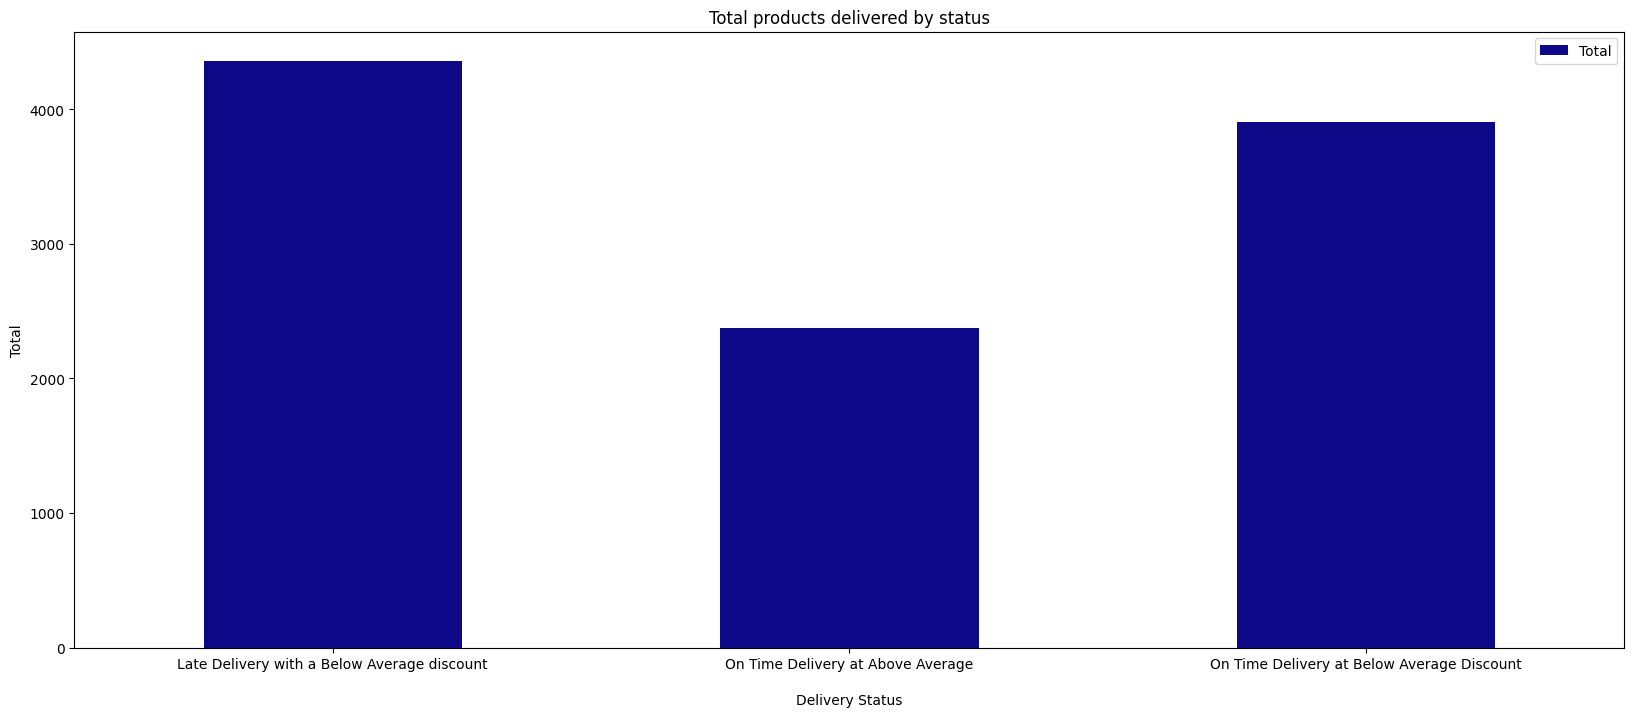

In [84]:
# Plot
df_report3.set_index('Delivery Status').plot(kind = 'bar',
                                            title = 'Total products delivered by status',
                                            ylabel = 'Total',
                                            xlabel = '\nDelivery Status',
                                            colormap = 'plasma',
                                            figsize = (20, 8))
plt.xticks(rotation = 0)
plt.show()

In [85]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,discount_range,discount_performance_range
9480,9481,D,Navio,3,5,184,2,alta,M,3,4883,0,Critical Delay,Critical Delay in Delivery by Ship,Below Average Discount,Late Delivery with a Below Average discount
10010,10011,A,Aviao,5,5,105,4,baixa,M,6,5135,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount
2571,2572,B,Navio,4,5,212,4,baixa,M,21,1014,1,No Delay,No Delay,Above Average Discount,On Time Delivery at Above Average
6900,6901,D,Navio,5,5,260,5,baixa,F,6,1860,0,Tolerable Delay,Tolerable Delivery Delay by Ship,Below Average Discount,Late Delivery with a Below Average discount
8027,8028,F,Navio,6,5,301,4,baixa,F,7,1393,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount
10984,10985,C,Navio,5,1,257,5,media,M,1,1102,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount
9486,9487,D,Navio,3,5,211,2,media,F,9,4577,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount
5755,5756,F,Aviao,6,1,309,4,baixa,F,6,1866,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount
9836,9837,A,Navio,4,1,197,3,alta,M,9,4917,0,Critical Delay,Critical Delay in Delivery by Ship,Below Average Discount,Late Delivery with a Below Average discount
9403,9404,F,Navio,6,1,287,4,media,M,5,1791,1,No Delay,No Delay,Below Average Discount,On Time Delivery at Below Average Discount


In [86]:
# Save dataframe
df_eng.to_csv('datasets/df_eng.csv', sep = ',', encoding = 'utf-8')

# The End